In [1]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\Final_Project\Log\UNSML.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda:...")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Final_Project\Data\Preprosessed_data\Da_Mis_Val.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")

In [2]:
df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Final_Project\Data\Preprosessed_data\Da_Mis_Val.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   2022 non-null   int64 
 1   name         2022 non-null   object
 2   birth_date   2022 non-null   object
 3   birth_place  2022 non-null   object
 4   death_date   2022 non-null   object
 5   death_place  2022 non-null   object
 6   occupation   2022 non-null   object
 7   awards       2022 non-null   object
 8   alma_mater   2022 non-null   object
 9   education    2022 non-null   object
 10  spouse       2022 non-null   object
 11  children     2022 non-null   object
dtypes: int64(1), object(11)
memory usage: 189.7+ KB


In [3]:
column_names = df.columns.tolist()
print(column_names)

['Unnamed: 0', 'name', 'birth_date', 'birth_place', 'death_date', 'death_place', 'occupation', 'awards', 'alma_mater', 'education', 'spouse', 'children']


In [4]:
df.head()

,Unnamed: 0,name,birth_date,birth_place,death_date,death_place,occupation,awards,alma_mater,education,spouse,children
0,0,Isaac Newton,{{Birth date|df=y|1643|01|04}},"{{nowrap|[[Woolsthorpe-by-Colsterworth]],}} Li...",{{Death date and age|df=y|1727|03|31|1643|01|04}},"[[Kensington]], Middlesex, England",Composer,{{unbulleted list | [[Fellow of the Royal Soci...,[[King's College London]],"[[Trinity College, Cambridge]] ([[Bachelor of ...",{{plainlist|,2
1,1,Marie Curie,{{birth date|df=y|1867|11|7}},"[[Warsaw]], [[Congress Poland|Poland]], Russia...",{{death date and age|df=y|1934|7|4|1867|11|7}},"[[Passy, Haute-Savoie|Passy]], [[Rhône-Alpes]]...",Composer,}},[[University of Paris]],[[Visva-Bharati University]] (dropped out)<ref...,{{plainlist|,2
2,2,Albert Einstein,{{Birth date|df=yes|1879|3|14}},"[[Ulm]], [[Kingdom of Württemberg]], Germany<r...",{{Death date and age|df=yes|1955|4|18|1879|3|14}},"[[Princeton, New Jersey]], U.S.",Composer,}},[[King's College London]],[[Visva-Bharati University]] (dropped out)<ref...,{{plainlist|,{{flatlist|
3,3,The Countess of Lovelace,{{birth date|df=y|1815|12|10}},"London, England",{{death date and age|df=y|1852|11|27|1815|12|10}},"[[Marylebone]], London, England",Composer,}},[[King's College London]],[[Visva-Bharati University]] (dropped out)<ref...,"{{marriage|[[William King-Noel, 1st Earl of Lo...",{{plainlist|
4,4,Leonardo da Vinci,{{birth date|df=yes|1452|04|15}},"possibly [[Anchiano]],{{efn|name=Birthplace}} ...",{{death date and age|df=yes|1519|5|2|1452|4|15}},"[[Clos Lucé]], [[Amboise]], {{awrap|[[Kingdom ...",Composer,}},[[King's College London]],Studio of [[Andrea del Verrocchio]],{{plainlist|,2


# Kasblar bo‘yicha o‘xshash shaxslarni aniqlash va ularni avtomatik guruhlarga ajratish. Occupation-based Clustering (K-Means)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# 1. Kasb ustuni
df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Final_Project\Data\Preprosessed_data\Da_Mis_Val.csv")  # o'zingizning faylingiz nomini yozing
occupations = df['occupation'].fillna('')

# 2. TF-IDF orqali raqamlashtirish
vectorizer = TfidfVectorizer()
X_occ = vectorizer.fit_transform(occupations)

# 3. K-means
kmeans_occ = KMeans(n_clusters=5, random_state=42)
df['occupation_cluster'] = kmeans_occ.fit_predict(X_occ)

print(df[['name', 'occupation', 'occupation_cluster']].head())


                       name occupation  occupation_cluster
0              Isaac Newton   Composer                   0
1               Marie Curie   Composer                   0
2           Albert Einstein   Composer                   0
3  The Countess of Lovelace   Composer                   0
4         Leonardo da Vinci   Composer                   0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2022 non-null   int64 
 1   name                2022 non-null   object
 2   birth_date          2022 non-null   object
 3   birth_place         2022 non-null   object
 4   death_date          2022 non-null   object
 5   death_place         2022 non-null   object
 6   occupation          2022 non-null   object
 7   awards              2022 non-null   object
 8   alma_mater          2022 non-null   object
 9   education           2022 non-null   object
 10  spouse              2022 non-null   object
 11  children            2022 non-null   object
 12  occupation_cluster  2022 non-null   int32 
dtypes: int32(1), int64(1), object(11)
memory usage: 197.6+ KB


In [7]:
df.head()

,Unnamed: 0,name,birth_date,birth_place,death_date,death_place,occupation,awards,alma_mater,education,spouse,children,occupation_cluster
0,0,Isaac Newton,{{Birth date|df=y|1643|01|04}},"{{nowrap|[[Woolsthorpe-by-Colsterworth]],}} Li...",{{Death date and age|df=y|1727|03|31|1643|01|04}},"[[Kensington]], Middlesex, England",Composer,{{unbulleted list | [[Fellow of the Royal Soci...,[[King's College London]],"[[Trinity College, Cambridge]] ([[Bachelor of ...",{{plainlist|,2,0
1,1,Marie Curie,{{birth date|df=y|1867|11|7}},"[[Warsaw]], [[Congress Poland|Poland]], Russia...",{{death date and age|df=y|1934|7|4|1867|11|7}},"[[Passy, Haute-Savoie|Passy]], [[Rhône-Alpes]]...",Composer,}},[[University of Paris]],[[Visva-Bharati University]] (dropped out)<ref...,{{plainlist|,2,0
2,2,Albert Einstein,{{Birth date|df=yes|1879|3|14}},"[[Ulm]], [[Kingdom of Württemberg]], Germany<r...",{{Death date and age|df=yes|1955|4|18|1879|3|14}},"[[Princeton, New Jersey]], U.S.",Composer,}},[[King's College London]],[[Visva-Bharati University]] (dropped out)<ref...,{{plainlist|,{{flatlist|,0
3,3,The Countess of Lovelace,{{birth date|df=y|1815|12|10}},"London, England",{{death date and age|df=y|1852|11|27|1815|12|10}},"[[Marylebone]], London, England",Composer,}},[[King's College London]],[[Visva-Bharati University]] (dropped out)<ref...,"{{marriage|[[William King-Noel, 1st Earl of Lo...",{{plainlist|,0
4,4,Leonardo da Vinci,{{birth date|df=yes|1452|04|15}},"possibly [[Anchiano]],{{efn|name=Birthplace}} ...",{{death date and age|df=yes|1519|5|2|1452|4|15}},"[[Clos Lucé]], [[Amboise]], {{awrap|[[Kingdom ...",Composer,}},[[King's College London]],Studio of [[Andrea del Verrocchio]],{{plainlist|,2,0


# Shaxslarning tug‘ilgan va vafot etgan yillaridan ularning umr davomiyligini hisoblab olamiz 

In [8]:
import pandas as pd

# Faqat yil (birinchi 4 raqam) ni olish
df['birth_year'] = df['birth_date'].astype(str).str.extract(r'(\d{4})').astype(float)
df['death_year'] = df['death_date'].astype(str).str.extract(r'(\d{4})').astype(float)

# Umr davomiyligini hisoblash
df['life_span'] = df['death_year'] - df['birth_year']

# Tekshirib ko‘ring
print(df[['birth_date', 'birth_year', 'death_date', 'death_year', 'life_span']].head())


                         birth_date  birth_year  \
0    {{Birth date|df=y|1643|01|04}}      1643.0   
1     {{birth date|df=y|1867|11|7}}      1867.0   
2   {{Birth date|df=yes|1879|3|14}}      1879.0   
3    {{birth date|df=y|1815|12|10}}      1815.0   
4  {{birth date|df=yes|1452|04|15}}      1452.0   

                                          death_date  death_year  life_span  
0  {{Death date and age|df=y|1727|03|31|1643|01|04}}      1727.0       84.0  
1     {{death date and age|df=y|1934|7|4|1867|11|7}}      1934.0       67.0  
2  {{Death date and age|df=yes|1955|4|18|1879|3|14}}      1955.0       76.0  
3  {{death date and age|df=y|1852|11|27|1815|12|10}}      1852.0       37.0  
4   {{death date and age|df=yes|1519|5|2|1452|4|15}}      1519.0       67.0  


In [9]:
df.head()

,Unnamed: 0,name,birth_date,birth_place,death_date,death_place,occupation,awards,alma_mater,education,spouse,children,occupation_cluster,birth_year,death_year,life_span
0,0,Isaac Newton,{{Birth date|df=y|1643|01|04}},"{{nowrap|[[Woolsthorpe-by-Colsterworth]],}} Li...",{{Death date and age|df=y|1727|03|31|1643|01|04}},"[[Kensington]], Middlesex, England",Composer,{{unbulleted list | [[Fellow of the Royal Soci...,[[King's College London]],"[[Trinity College, Cambridge]] ([[Bachelor of ...",{{plainlist|,2,0,1643.0,1727.0,84.0
1,1,Marie Curie,{{birth date|df=y|1867|11|7}},"[[Warsaw]], [[Congress Poland|Poland]], Russia...",{{death date and age|df=y|1934|7|4|1867|11|7}},"[[Passy, Haute-Savoie|Passy]], [[Rhône-Alpes]]...",Composer,}},[[University of Paris]],[[Visva-Bharati University]] (dropped out)<ref...,{{plainlist|,2,0,1867.0,1934.0,67.0
2,2,Albert Einstein,{{Birth date|df=yes|1879|3|14}},"[[Ulm]], [[Kingdom of Württemberg]], Germany<r...",{{Death date and age|df=yes|1955|4|18|1879|3|14}},"[[Princeton, New Jersey]], U.S.",Composer,}},[[King's College London]],[[Visva-Bharati University]] (dropped out)<ref...,{{plainlist|,{{flatlist|,0,1879.0,1955.0,76.0
3,3,The Countess of Lovelace,{{birth date|df=y|1815|12|10}},"London, England",{{death date and age|df=y|1852|11|27|1815|12|10}},"[[Marylebone]], London, England",Composer,}},[[King's College London]],[[Visva-Bharati University]] (dropped out)<ref...,"{{marriage|[[William King-Noel, 1st Earl of Lo...",{{plainlist|,0,1815.0,1852.0,37.0
4,4,Leonardo da Vinci,{{birth date|df=yes|1452|04|15}},"possibly [[Anchiano]],{{efn|name=Birthplace}} ...",{{death date and age|df=yes|1519|5|2|1452|4|15}},"[[Clos Lucé]], [[Amboise]], {{awrap|[[Kingdom ...",Composer,}},[[King's College London]],Studio of [[Andrea del Verrocchio]],{{plainlist|,2,0,1452.0,1519.0,67.0


# Life Span Clustering

# Tarixiy shaxslarni umr davomiyligi, tug‘ilgan va vafot yillari bo‘yicha o‘xshash guruhlarga ajratish.

# Hierarchical clustering // agglomerative (pastdan yuqoriga) (birlashtirish) usuli orqali 

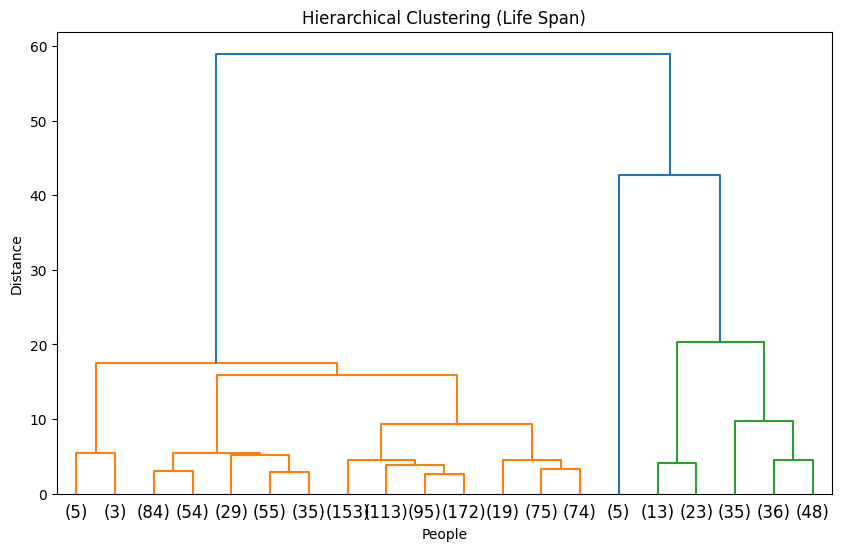

                       name  birth_year  death_year  life_span  \
0              Isaac Newton      1643.0      1727.0       84.0   
1               Marie Curie      1867.0      1934.0       67.0   
2           Albert Einstein      1879.0      1955.0       76.0   
3  The Countess of Lovelace      1815.0      1852.0       37.0   
4         Leonardo da Vinci      1452.0      1519.0       67.0   

   life_span_cluster  
0                2.0  
1                2.0  
2                2.0  
3                2.0  
4                5.0  


In [10]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# 1. NaN bo‘lmagan satrlarni ajratish
life_data = df[['birth_year', 'death_year', 'life_span']].dropna()

# 2. Standartlashtirish
scaler = StandardScaler()
life_scaled = scaler.fit_transform(life_data)

# 3. Hierarchical clustering
linked = linkage(life_scaled, method='ward')

# 4. Dendrogram chizish
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title('Hierarchical Clustering (Life Span)')
plt.xlabel("People")
plt.ylabel("Distance")
plt.show()

# 5. Cluster raqamlarini berish
df.loc[life_data.index, 'life_span_cluster'] = fcluster(linked, 5, criterion='maxclust')

# Natijani ko‘rish
print(df[['name', 'birth_year', 'death_year', 'life_span', 'life_span_cluster']].head())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2022 non-null   int64  
 1   name                2022 non-null   object 
 2   birth_date          2022 non-null   object 
 3   birth_place         2022 non-null   object 
 4   death_date          2022 non-null   object 
 5   death_place         2022 non-null   object 
 6   occupation          2022 non-null   object 
 7   awards              2022 non-null   object 
 8   alma_mater          2022 non-null   object 
 9   education           2022 non-null   object 
 10  spouse              2022 non-null   object 
 11  children            2022 non-null   object 
 12  occupation_cluster  2022 non-null   int32  
 13  birth_year          1930 non-null   float64
 14  death_year          1153 non-null   float64
 15  life_span           1126 non-null   float64
 16  life_s

In [ ]:
"life_span_cluster", birth_year, death_year,  life_span 

array([ 2.,  5., nan,  1.,  4.,  3.])

In [ ]:
import pandas as pd


cols = ['life_span_cluster', 'birth_year', 'death_year', 'life_span'] 


df[cols] = df[cols].apply(lambda col: col.fillna(col.mean()))


In [17]:
# tanlangan ustunlar uchun NaN soni
print(df[cols].isna().sum())

# yoki butun DataFrame uchun
print(df.isna().sum())


life_span_cluster    0
birth_year           0
death_year           0
life_span            0
dtype: int64
Unnamed: 0            0
name                  0
birth_date            0
birth_place           0
death_date            0
death_place           0
occupation            0
awards                0
alma_mater            0
education             0
spouse                0
children              0
occupation_cluster    0
birth_year            0
death_year            0
life_span             0
life_span_cluster     0
dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2022 non-null   int64  
 1   name                2022 non-null   object 
 2   birth_date          2022 non-null   object 
 3   birth_place         2022 non-null   object 
 4   death_date          2022 non-null   object 
 5   death_place         2022 non-null   object 
 6   occupation          2022 non-null   object 
 7   awards              2022 non-null   object 
 8   alma_mater          2022 non-null   object 
 9   education           2022 non-null   object 
 10  spouse              2022 non-null   object 
 11  children            2022 non-null   object 
 12  occupation_cluster  2022 non-null   int32  
 13  birth_year          2022 non-null   float64
 14  death_year          2022 non-null   float64
 15  life_span           2022 non-null   float64
 16  life_s

# Education & Awards Based Clustering (K-Means)

# Shaxslarning ta’lim (education) va mukofotlar (awards) matnli ma’lumotlarini birlashtirib, ularni TF-IDF bilan raqamlashtirib, so‘ngra TruncatedSVD yordamida o‘lchamini kamaytirib, oxirida K-Means klasterlash orqali 5 guruhga ajratadi.

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD

# 1. Ta’lim va mukofotlar
text_data = df[['education', 'awards']].fillna('').agg(' '.join, axis=1)

# 2. TF-IDF
tfidf = TfidfVectorizer()
X_text = tfidf.fit_transform(text_data)

# 3. Ixtiyoriy: o'lchamni kamaytirish
svd = TruncatedSVD(n_components=50, random_state=42)
X_reduced = svd.fit_transform(X_text)

# 4. K-Means
kmeans_edu_award = KMeans(n_clusters=5, random_state=42)
df['edu_award_cluster'] = kmeans_edu_award.fit_predict(X_reduced)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2022 non-null   int64  
 1   name                2022 non-null   object 
 2   birth_date          2022 non-null   object 
 3   birth_place         2022 non-null   object 
 4   death_date          2022 non-null   object 
 5   death_place         2022 non-null   object 
 6   occupation          2022 non-null   object 
 7   awards              2022 non-null   object 
 8   alma_mater          2022 non-null   object 
 9   education           2022 non-null   object 
 10  spouse              2022 non-null   object 
 11  children            2022 non-null   object 
 12  occupation_cluster  2022 non-null   int32  
 13  birth_year          2022 non-null   float64
 14  death_year          2022 non-null   float64
 15  life_span           2022 non-null   float64
 16  life_s

# Combined Biographical Clustering (K-Means)

# Shaxslarning bir nechta raqamli atributlari asosida (kasb klasteri, tug‘ilgan-yil, vafot-yil, umr davomiyligi, umr davomiyligi klasteri va ta’lim/mukofot klasteri) ma’lumotlarni standartlashtirib, K-Means yordamida 4 ta guruhga bo‘lishni amalga oshiradi.

In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Foydalaniladigan ustunlar (faqat raqamli ma'lumotlar bilan)
features = ['occupation_cluster', 'birth_year', 'death_year', 'life_span', 'life_span_cluster', 'edu_award_cluster']

# 2. NaN larni ustun o'rtachasi (mean) bilan to'ldirish
df[features] = df[features].apply(lambda col: col.fillna(col.mean()))

# 3. Scaling — KMeans uchun normalize qilish (agar kerak bo‘lsa)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# 4. KMeans modelini yaratish (masalan, 4 ta klaster bilan)
kmeans = KMeans(n_clusters=4, random_state=42)
df['bio_cluster'] = kmeans.fit_predict(X_scaled)

# 5. Natijani ko'rish
print(df[['name', 'bio_cluster']].head())

                       name  bio_cluster
0              Isaac Newton            1
1               Marie Curie            0
2           Albert Einstein            0
3  The Countess of Lovelace            0
4         Leonardo da Vinci            3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2022 non-null   int64  
 1   name                2022 non-null   object 
 2   birth_date          2022 non-null   object 
 3   birth_place         2022 non-null   object 
 4   death_date          2022 non-null   object 
 5   death_place         2022 non-null   object 
 6   occupation          2022 non-null   object 
 7   awards              2022 non-null   object 
 8   alma_mater          2022 non-null   object 
 9   education           2022 non-null   object 
 10  spouse              2022 non-null   object 
 11  children            2022 non-null   object 
 12  occupation_cluster  2022 non-null   int32  
 13  birth_year          2022 non-null   float64
 14  death_year          2022 non-null   float64
 15  life_span           2022 non-null   float64
 16  life_s

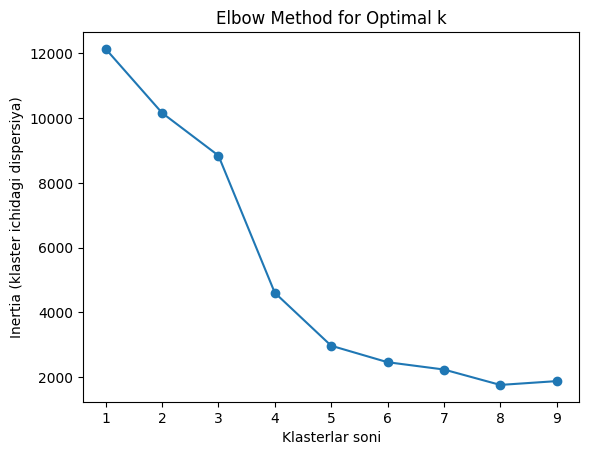

In [23]:
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Klasterlar soni')
plt.ylabel('Inertia (klaster ichidagi dispersiya)')
plt.title('Elbow Method for Optimal k')
plt.show()

# TF-IDF yordamida raqamlashtirilgan kasb ma’lumotlarini oldindan hisoblangan klaster raqamlari bo‘yicha vizualizatsiya qiladi. Kasb bo‘yicha klasterlash natijalari 2D yoki 3D grafikda ko‘rsatiladi, klasterlar ranglar bilan ajratiladi

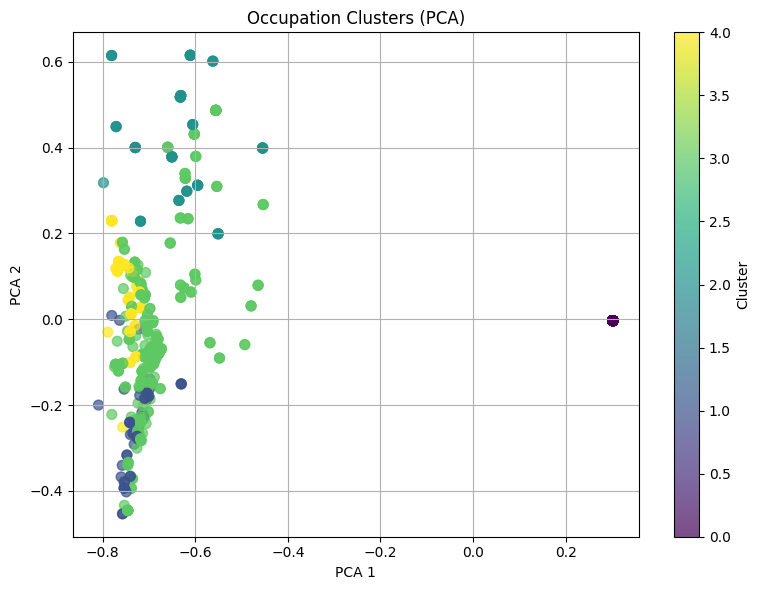

In [10]:
# Agar siz TF-IDF dan foydalangan bo‘lsangiz:
plot_clusters(X_occ.toarray(), df['occupation_cluster'], title='Occupation Clusters (PCA)')


# education + awards uchun:

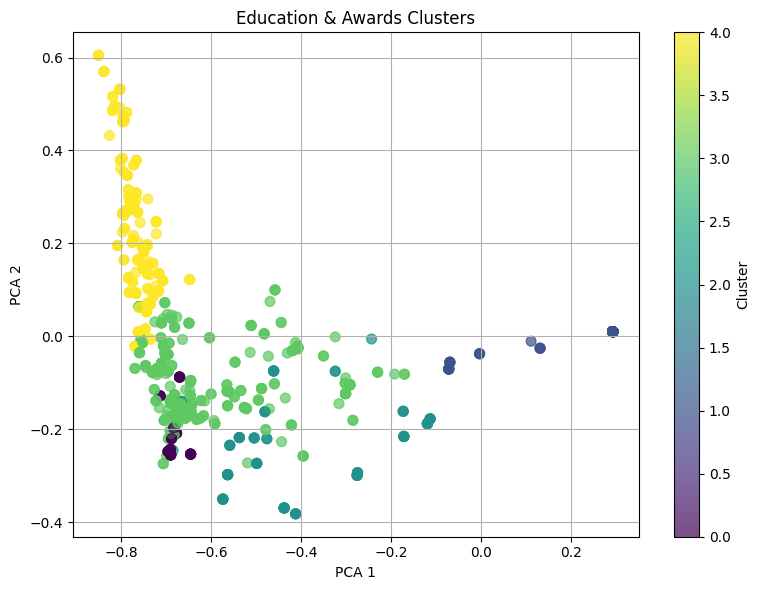

In [24]:
plot_clusters(X_reduced, df['edu_award_cluster'], title='Education & Awards Clusters')

# combined biographical clustering

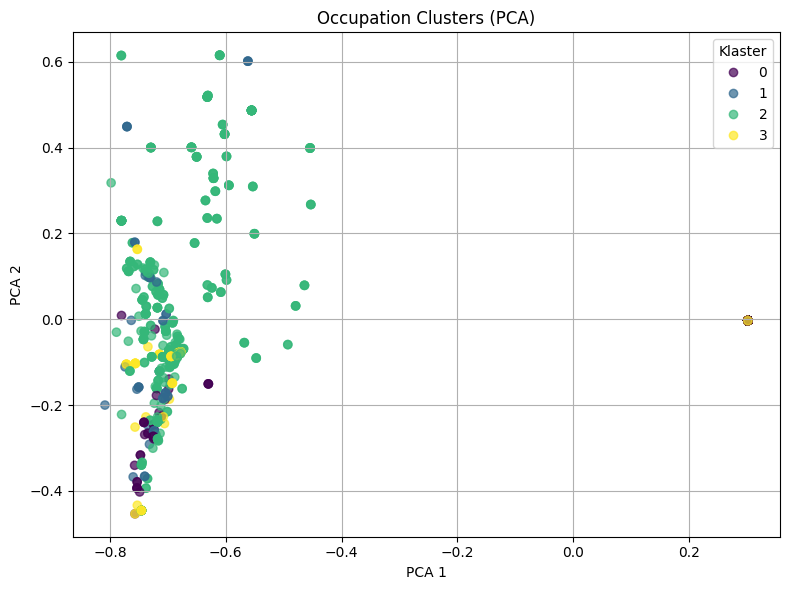

In [25]:
plot_clusters(X_occ.toarray(), df['bio_cluster'], title='Occupation Clusters (PCA)')


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2022 non-null   int64  
 1   name                2022 non-null   object 
 2   birth_date          2022 non-null   object 
 3   birth_place         2022 non-null   object 
 4   death_date          2022 non-null   object 
 5   death_place         2022 non-null   object 
 6   occupation          2022 non-null   object 
 7   awards              2022 non-null   object 
 8   alma_mater          2022 non-null   object 
 9   education           2022 non-null   object 
 10  spouse              2022 non-null   object 
 11  children            2022 non-null   object 
 12  occupation_cluster  2022 non-null   int32  
 13  birth_year          2022 non-null   float64
 14  death_year          2022 non-null   float64
 15  life_span           2022 non-null   float64
 16  life_s

In [27]:
df.to_csv(r"C:\Users\Rasulbek907\Desktop\Final_Project\Data\Preprosessed_data\Clustering.csv")